### Assignment#1

#### Necessary Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

##### Reading First DataSet (Iris)

In [70]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Information about all columns...

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Summary of numerical columns

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


#### Outlier Detection using IQR

In [73]:
def detect_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers


for column in df.select_dtypes(include=np.number).columns:
    outliers = detect_outliers(df[column])
    print(f"Outliers in {column}: {outliers.values}")

Outliers in Id: []
Outliers in SepalLengthCm: []
Outliers in SepalWidthCm: [4.4 4.1 4.2 2. ]
Outliers in PetalLengthCm: []
Outliers in PetalWidthCm: []


#### Mode of data...

In [74]:
for column in df.columns:
    mode_value = df[column].mode().values[0]
    print(f"Mode of {column}: {mode_value}")

Mode of Id: 1
Mode of SepalLengthCm: 5.0
Mode of SepalWidthCm: 3.0
Mode of PetalLengthCm: 1.5
Mode of PetalWidthCm: 0.2
Mode of Species: Iris-setosa


#### Variance of data...

In [75]:
for column in df.select_dtypes(include=np.number).columns:
    variance = df[column].var()
    print(f"Variance of {column}: {variance}")

Variance of Id: 1887.5
Variance of SepalLengthCm: 0.6856935123042507
Variance of SepalWidthCm: 0.1880040268456376
Variance of PetalLengthCm: 3.113179418344519
Variance of PetalWidthCm: 0.582414317673378


#### Graphical Representation

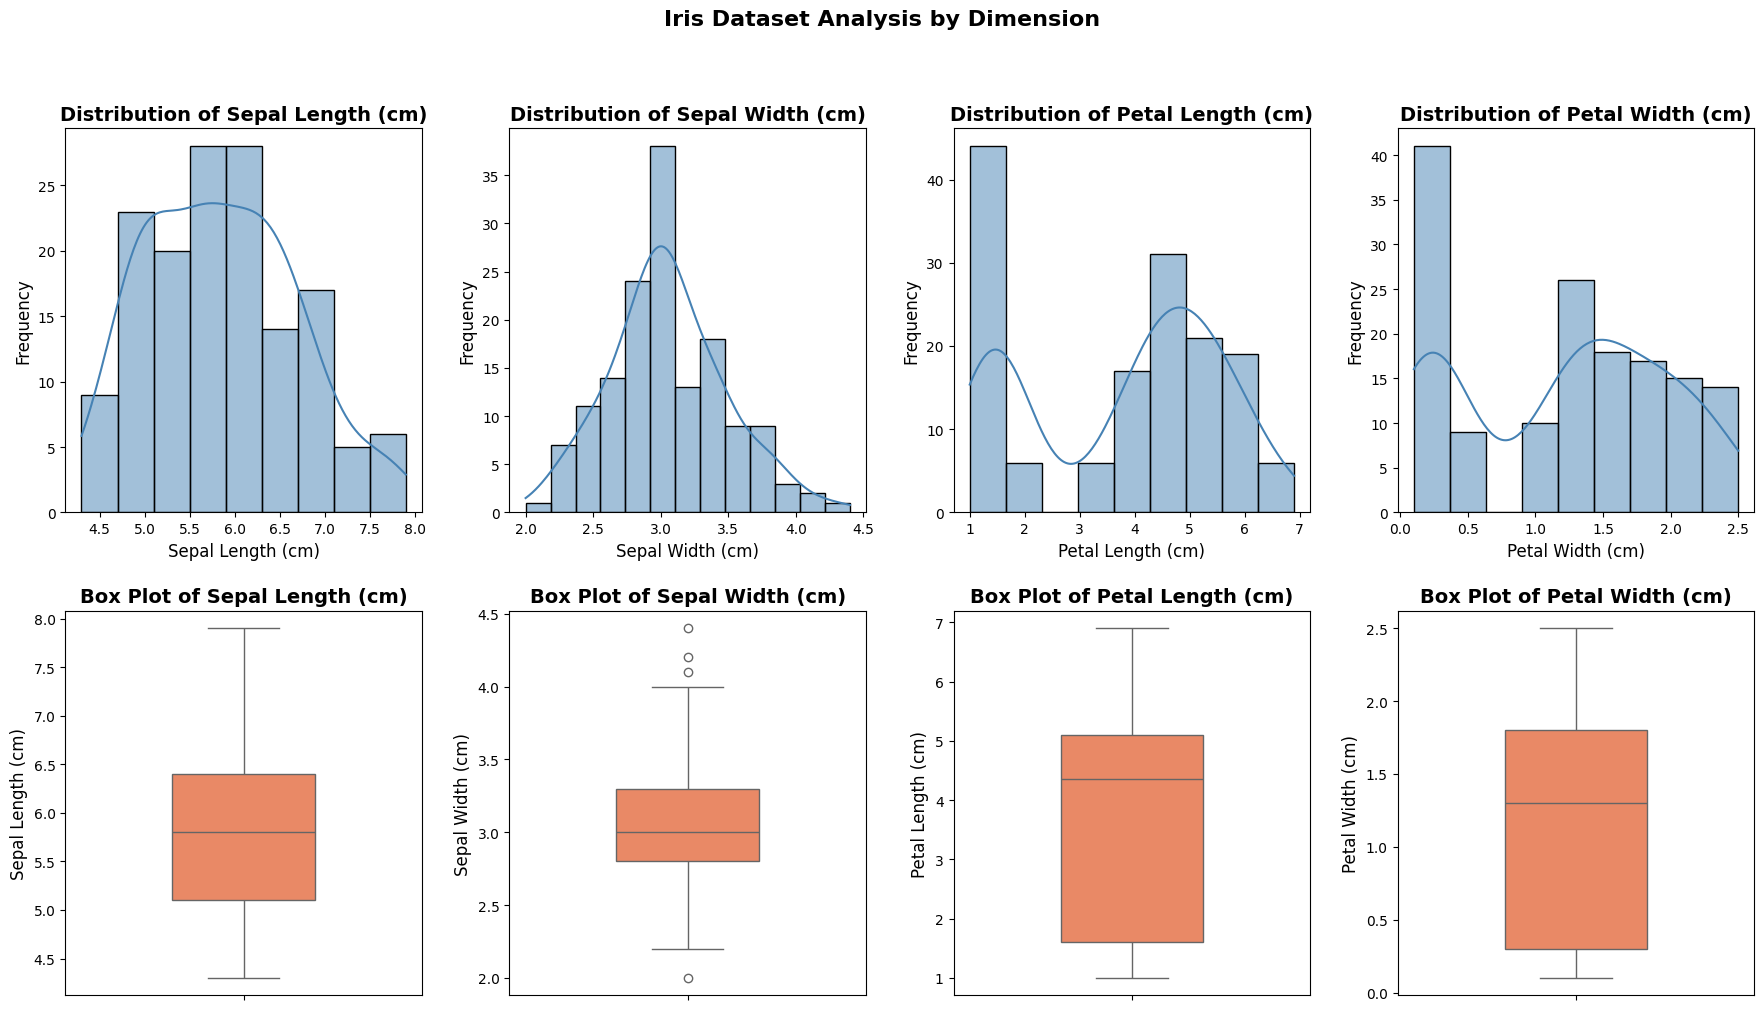

In [76]:
dimensions = {
    "SepalLengthCm": "Sepal Length (cm)",
    "SepalWidthCm": "Sepal Width (cm)",
    "PetalLengthCm": "Petal Length (cm)",
    "PetalWidthCm": "Petal Width (cm)",
}

sns.set_palette("coolwarm")
fig, axs = plt.subplots(2, len(dimensions), figsize=(18, 10))
fig.suptitle(
    "Iris Dataset Analysis by Dimension", fontsize=16, fontweight="bold", y=1.02
)

for i, (col, title) in enumerate(dimensions.items()):
    sns.histplot(df[col], kde=True, color="steelblue", ax=axs[0, i], edgecolor="black")
    axs[0, i].set_title(f"Distribution of {title}", fontsize=14, fontweight="bold")
    axs[0, i].set_xlabel(title, fontsize=12)
    axs[0, i].set_ylabel("Frequency", fontsize=12)

    sns.boxplot(y=df[col], color="coral", ax=axs[1, i], width=0.4)
    axs[1, i].set_title(f"Box Plot of {title}", fontsize=14, fontweight="bold")
    axs[1, i].set_ylabel(title, fontsize=12)

plt.tight_layout(pad=2)
plt.show()

#### Missing Values Check...

In [77]:
missing_values = df.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


##### Reading Second DataSet (Titanic)

In [78]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Information about all columns...

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Summary of numerical columns

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Outlier Detection using Z-Score

In [81]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    outliers = data[np.abs(z_scores) > threshold]
    return outliers

for column in df.select_dtypes(include=np.number).columns:
    outliers = detect_outliers_zscore(df[column])
    print(f"Outliers in {column}: {outliers.values}")

Outliers in PassengerId: []
Outliers in Survived: []
Outliers in Pclass: []
Outliers in Age: [80. 74.]
Outliers in SibSp: [4 4 5 4 5 4 8 4 4 8 4 8 4 4 4 4 8 5 5 4 4 5 4 4 8 4 4 8 4 8]
Outliers in Parch: [5 5 3 4 4 3 4 4 5 5 6 3 3 3 5]
Outliers in Fare: [263.     263.     247.5208 512.3292 247.5208 262.375  263.     211.5
 227.525  263.     221.7792 227.525  512.3292 211.3375 227.525  227.525
 211.3375 512.3292 262.375  211.3375]


#### Mode of data...

In [82]:
for column in df.columns:
    mode_value = df[column].mode().values[0]
    print(f"Mode of {column}: {mode_value}")

Mode of PassengerId: 1
Mode of Survived: 0
Mode of Pclass: 3
Mode of Name: Abbing, Mr. Anthony
Mode of Sex: male
Mode of Age: 24.0
Mode of SibSp: 0
Mode of Parch: 0
Mode of Ticket: 1601
Mode of Fare: 8.05
Mode of Cabin: B96 B98
Mode of Embarked: S


#### Variance of data...

In [83]:
for column in df.select_dtypes(include=np.number).columns:
    variance = df[column].var()
    print(f"Variance of {column}: {variance}")

Variance of PassengerId: 66231.0
Variance of Survived: 0.23677221654749742
Variance of Pclass: 0.6990151199889028
Variance of Age: 211.01912474630802
Variance of SibSp: 1.2160430774662985
Variance of Parch: 0.6497282437357343
Variance of Fare: 2469.436845743116


#### Graphical Representation

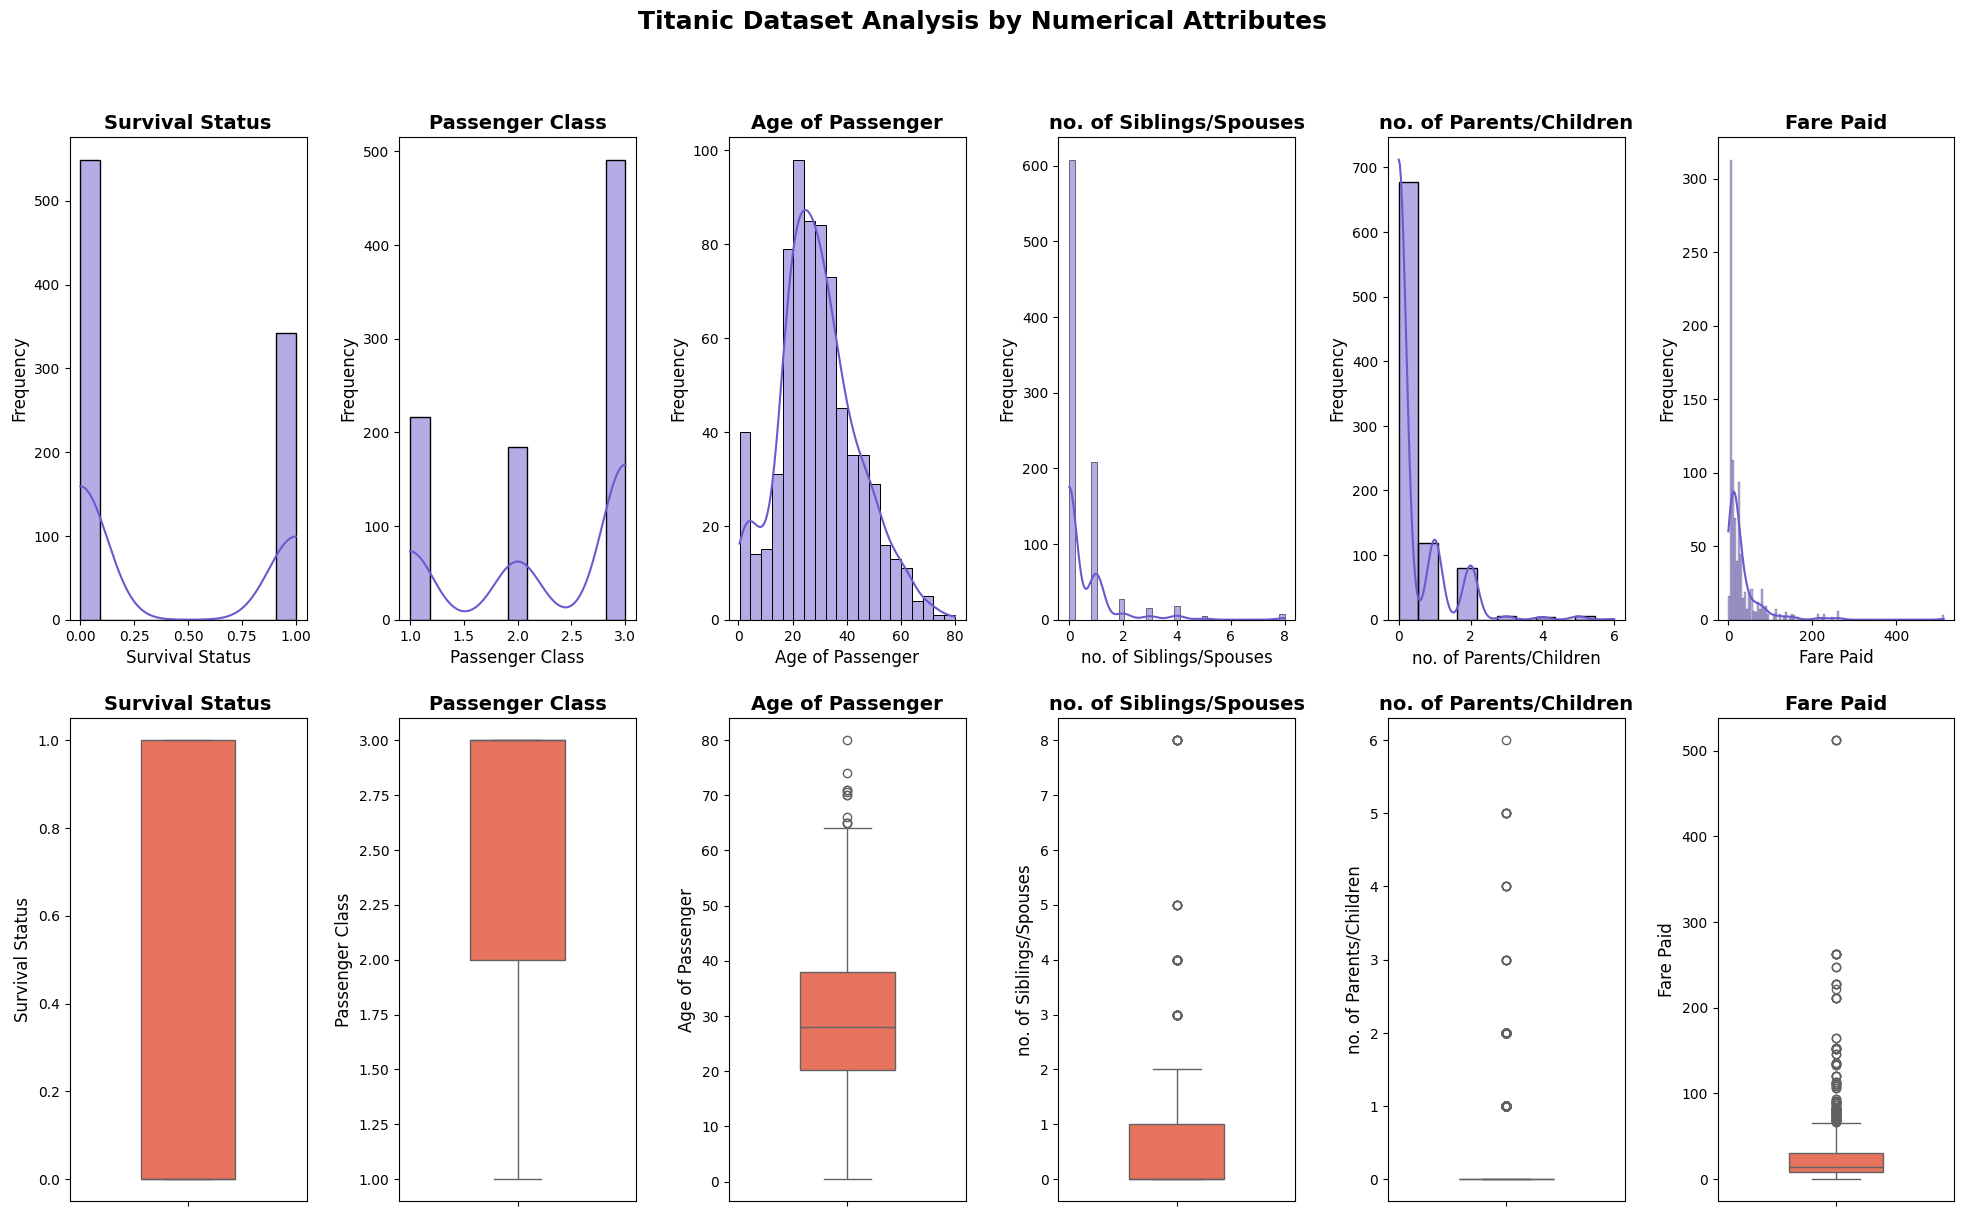

In [84]:
dimensions = {
    "Survived": "Survival Status",
    "Pclass": "Passenger Class",
    "Age": "Age of Passenger",
    "SibSp": "no. of Siblings/Spouses",
    "Parch": "no. of Parents/Children",
    "Fare": "Fare Paid",
}

sns.set_palette("pastel")
fig, axs = plt.subplots(2, len(dimensions), figsize=(20, 12))
fig.suptitle(
    "Titanic Dataset Analysis by Numerical Attributes",
    fontsize=18,
    fontweight="bold",
    y=1.02,
)

for i, (col, title) in enumerate(dimensions.items()):
    sns.histplot(df[col], kde=True, color="slateblue", ax=axs[0, i], edgecolor="black")
    axs[0, i].set_title(f"{title}", fontsize=14, fontweight="bold")
    axs[0, i].set_xlabel(title, fontsize=12)
    axs[0, i].set_ylabel("Frequency", fontsize=12)
    sns.boxplot(y=df[col], color="tomato", ax=axs[1, i], width=0.4)
    axs[1, i].set_title(f"{title}", fontsize=14, fontweight="bold")
    axs[1, i].set_ylabel(title, fontsize=12)

plt.tight_layout(pad=2)
plt.show()

#### Missing Values Check...

In [85]:
missing_values = df.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Filling the missing values:
- **Cabin Column:** Since the Cabin column has 77% missing values, it’s likely best to drop it.
- **Age Column:** Filling with the median age, which is a common approach for numerical data with missing values.
- **Embark Column:** Since there are only two missing values, we fill them with the mode

In [86]:
df = df.drop(columns=["Cabin"])
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print("Number of missing values after imputation:")
print(df.isnull().sum())

Number of missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_5256\2113648212.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_5256\2113648212.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

#### Checking again fro any leftovers...

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
